In [11]:
import pandas as pd

# Cargar los datos desde los archivos CSV
cash_requests_df = pd.read_csv('project_dataset/extract - cash request - data analyst.csv')
fees_df = pd.read_csv('project_dataset/extract - fees - data analyst - .csv')

# Convertir las columnas de fecha a datetime
cash_requests_df['created_at'] = pd.to_datetime(cash_requests_df['created_at'], utc=True)
fees_df['created_at'] = pd.to_datetime(fees_df['created_at'], utc=True)

# Crear columna de cohorte en cash_requests_df basada en la fecha de la primera solicitud de cada usuario
cash_requests_df['cohort'] = cash_requests_df.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


/var/folders/8d/_dfy3v191xq4fpx56kpljr380000gn/T/ipykernel_7348/239847516.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_requests_df['cohort'] = cash_requests_df.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


In [12]:
# Unir fees_df con cash_requests_df usando 'cash_request_id' y 'id'
fees_df = fees_df.merge(cash_requests_df[['id', 'cohort']], left_on='cash_request_id', right_on='id', how='left')

In [13]:
# Filtrar las tarifas para excluir las que tienen estado 'rejected' o 'cancelled'
fees_df = fees_df[~fees_df['status'].isin(['rejected', 'cancelled'])]

In [14]:
# Calcular los ingresos generados por cada cohorte
cohort_revenue = fees_df.groupby('cohort')['total_amount'].sum().reset_index()
cohort_revenue.columns = ['Cohorte', 'Ingresos Generados']

cohort_revenue.head(10)

,Cohorte,Ingresos Generados
0,2019-11,30.0
1,2019-12,1060.0
2,2020-01,485.0
3,2020-02,640.0
4,2020-03,610.0
5,2020-04,1495.0
6,2020-05,3615.0
7,2020-06,13500.0
8,2020-07,10700.0
9,2020-08,4985.0


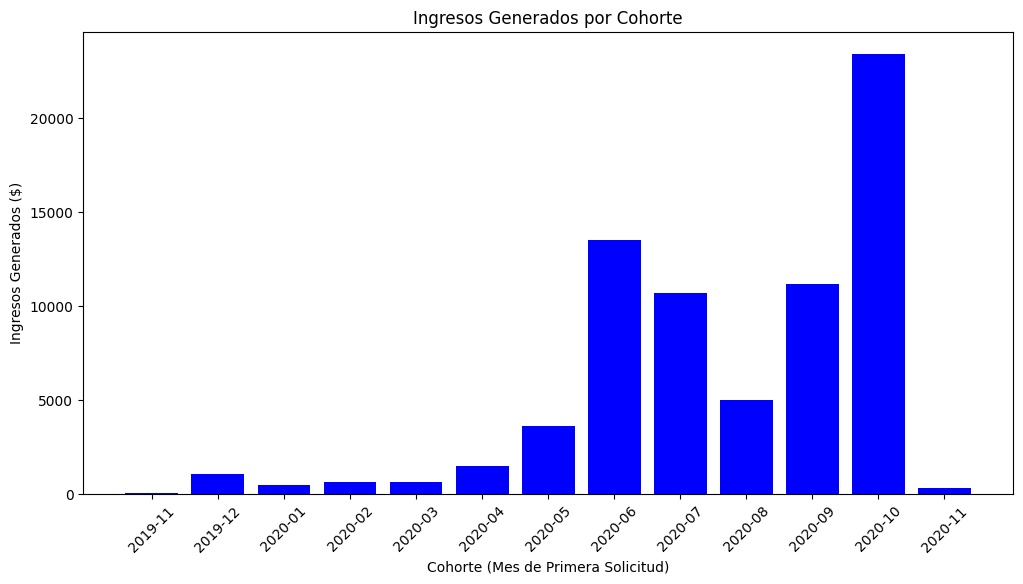

In [15]:
import matplotlib.pyplot as plt

# Graficar los ingresos por cohorte
plt.figure(figsize=(12, 6))
plt.bar(cohort_revenue['Cohorte'].astype(str), cohort_revenue['Ingresos Generados'], color='blue')
plt.xlabel('Cohorte (Mes de Primera Solicitud)')
plt.ylabel('Ingresos Generados ($)')
plt.title('Ingresos Generados por Cohorte')
plt.xticks(rotation=45)
plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que 'created_at' es la fecha de la creación de la solicitud y 'cohort' es la cohorte basada en esta fecha
# Asegúrate de que 'created_at' y 'cohort' están en el formato correcto
fees_df['month'] = fees_df['created_at'].dt.to_period('M')

# Agrupar por cohorte y mes para sumar los ingresos
cohort_income_monthly = fees_df.groupby(['cohort', 'month'])['total_amount'].sum().reset_index()

# Pivotear los datos para el mapa de calor
pivot_income = cohort_income_monthly.pivot(index='cohort', columns='month', values='total_amount')

/var/folders/8d/_dfy3v191xq4fpx56kpljr380000gn/T/ipykernel_7348/934642966.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  fees_df['month'] = fees_df['created_at'].dt.to_period('M')


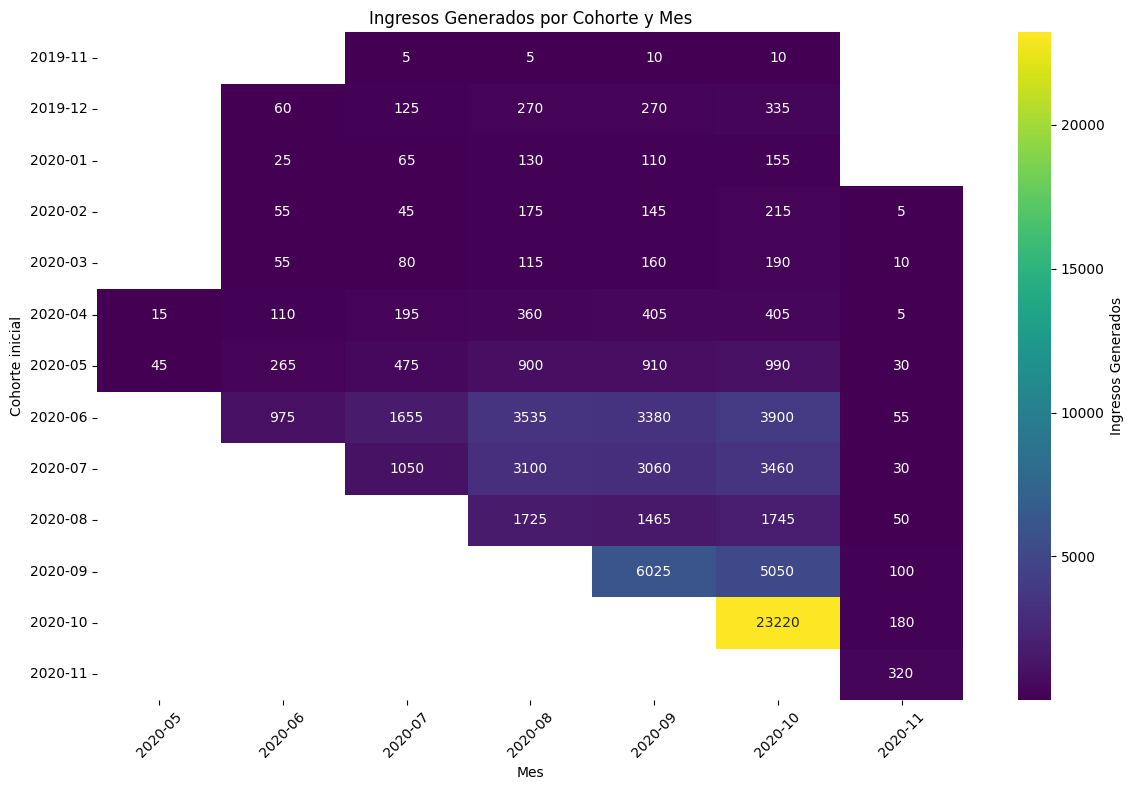

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_income, cmap='viridis', annot=True, fmt=".0f", cbar_kws={'label': 'Ingresos Generados'})
plt.title('Ingresos Generados por Cohorte y Mes')
plt.xlabel('Mes')
plt.ylabel('Cohorte inicial')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()